In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import time, datetime
import numpy as np
import matplotlib.pyplot as plt 

# Final Project: Motor Vehicle Collisions - Crashes of New York City#
## Data Story ##
The Motor Vehicle Collisions crash table contains details on the crash event. Each row represents a crash event. The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC.<a href="https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95" >[1]</a> We found this data-set a good fit for our final project, because it has some overlapping features with the Police Department Incident Reports data-set we have worked on a lot, so we can apply many methods and techniques we learned in the exercises. By the way, there is also some other interesting features we can explore with our own imaginations.

The raw data-set consists of 1407835(1407831 with at least one variable available) rows and 29 variables/columns. The motor vehicle collisions were recorded from 2012 to 2021 as we downloaded the latest version. Cases recorded distribute in 5 boroughs in NYC and they are Bronx, Brooklyn, Manhattan, Queens and Staten Island. 

In [2]:
#import csv file of the target data-set
df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")

#we want to have access to dataframe.dt.year/month/day/hour/minute
#change crash date format into the date format of standard dataframe
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'].astype(str), format='%m/%d/%Y', errors='coerce')
#change crash time format into the time format of standard dataframe
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'].astype(str), format='%H:%M')

#access the number of rows
print("The number of rows of the raw data-set is: {}".format(len(df)))
print("The number of rows of the data-set without rows containing no information is: {}"
      .format(len(df.dropna(how='all'))))
#access the number of variables/columns
print("The number of variables/columns of the data-set is: {}".format(len(df.columns)))
#access all variables
print("The variables of the data-set are: {}".format(np.array(df.columns)))

The number of rows of the raw data-set is: 1407835
The number of rows of the data-set without rows containing no information is: 1407831
The number of variables/columns of the data-set is: 29
The variables of the data-set are: ['CRASH DATE' 'CRASH TIME' 'BOROUGH' 'ZIP CODE' 'LATITUDE' 'LONGITUDE'
 'LOCATION' 'ON STREET NAME' 'CROSS STREET NAME' 'OFF STREET NAME'
 'NUMBER OF PERSONS INJURED' 'NUMBER OF PERSONS KILLED'
 'NUMBER OF PEDESTRIANS INJURED' 'NUMBER OF PEDESTRIANS KILLED'
 'NUMBER OF CYCLIST INJURED' 'NUMBER OF CYCLIST KILLED'
 'NUMBER OF MOTORIST INJURED' 'NUMBER OF MOTORIST KILLED'
 'CONTRIBUTING FACTOR VEHICLE 1' 'CONTRIBUTING FACTOR VEHICLE 2'
 'CONTRIBUTING FACTOR VEHICLE 3' 'CONTRIBUTING FACTOR VEHICLE 4'
 'CONTRIBUTING FACTOR VEHICLE 5' 'COLLISION_ID' 'VEHICLE TYPE CODE 1'
 'VEHICLE TYPE CODE 2' 'VEHICLE TYPE CODE 3' 'VEHICLE TYPE CODE 4'
 'VEHICLE TYPE CODE 5']


In [3]:
#access all years included in the data-set and sort them by numbers
years = np.array(df['CRASH DATE'].dt.year.drop_duplicates().dropna().sort_values()).astype(int)
print("Years involved in the motor vehicle collisions are: {}".format(years))
#access all boroughs included in the data-set and sort them by alphabets
boroughs = np.array(df['BOROUGH'].drop_duplicates().dropna().sort_values())
print("Boroughs involved in the motor vehicle collisions are: {}".format(boroughs))

Years involved in the motor vehicle collisions are: [2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
Boroughs involved in the motor vehicle collisions are: ['BRONX' 'BROOKLYN' 'MANHATTAN' 'QUEENS' 'STATEN ISLAND']


In [4]:
#enable the label for months
months = np.array(df['CRASH DATE'].dt.month.drop_duplicates().dropna().sort_values()).astype(int)
#enable the label for days
days = np.array(df['CRASH DATE'].dt.day.drop_duplicates().dropna().sort_values()).astype(int)
#enable the label for hours
hours = np.array(df['CRASH TIME'].dt.hour.drop_duplicates().dropna().sort_values()).astype(int)
#enable the label for minutes
minutes = np.array(df['CRASH TIME'].dt.minute.drop_duplicates().dropna().sort_values()).astype(int)

In [5]:
df = df.dropna(how='all') #drop rows containing no information

count_year = df['CRASH DATE'].dt.year.value_counts().sort_index()
count_month = df['CRASH DATE'].dt.month.value_counts().sort_index()
count_day = df['CRASH DATE'].dt.day.value_counts().sort_index()
count_hour = df['CRASH TIME'].dt.hour.value_counts().sort_index()
count_minute = df['CRASH TIME'].dt.minute.value_counts().sort_index()

count_borough = df['BOROUGH'].value_counts().sort_index()

person_injured = df['NUMBER OF PERSONS INJURED'].value_counts().sort_index()
person_killed = df['NUMBER OF PERSONS KILLED'].value_counts().sort_index()
pedestrian_injured = df['NUMBER OF PEDESTRIANS INJURED'].value_counts().sort_index()
pedestrian_killed = df['NUMBER OF PEDESTRIANS KILLED'].value_counts().sort_index()
cyclist_injured = df['NUMBER OF CYCLIST INJURED'].value_counts().sort_index()
cyclist_killed = df['NUMBER OF CYCLIST KILLED'].value_counts().sort_index()
motorist_injured = df['NUMBER OF MOTORIST INJURED'].value_counts().sort_index()
motorist_killed = df['NUMBER OF MOTORIST KILLED'].value_counts().sort_index()

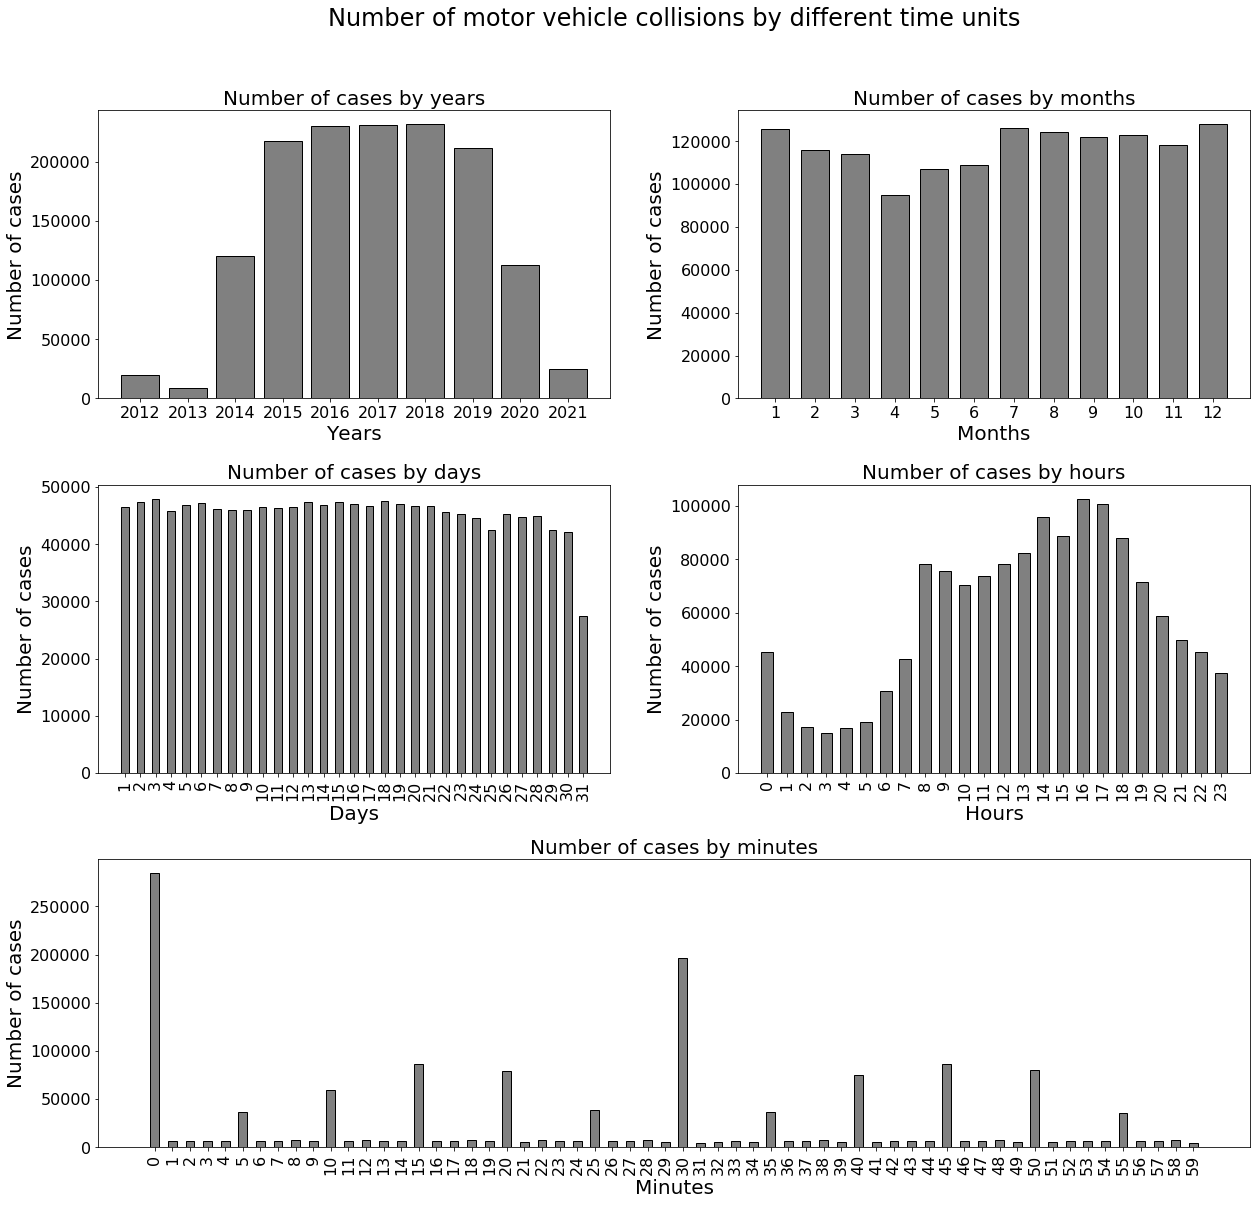

In [16]:
plt.figure(figsize=(20,18), constrained_layout=True)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.25, hspace=0.3)
ax1 = plt.subplot(3,2,1)
ax2 = plt.subplot(3,2,2)
ax3 = plt.subplot(3,2,3)
ax4 = plt.subplot(3,2,4)
ax5 = plt.subplot(3,1,3)
axes = [ax1, ax2, ax3, ax4, ax5]
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20

axes[0].bar(count_year.index, count_year.values, width=0.8, color='grey', edgecolor='black')
axes[0].xaxis.set_tick_params(labelsize=16)
axes[0].yaxis.set_tick_params(labelsize=16)
axes[0].xaxis.set_ticks(np.arange(years[0], years[-1]+1, 1))
axes[0].xaxis.set_label_text('Years')
axes[0].yaxis.set_label_text('Number of cases')
axes[0].title.set_text('Number of cases by years')

axes[1].bar(count_month.index, count_month.values, width=0.7, color='grey', edgecolor='black')
axes[1].xaxis.set_tick_params(labelsize=16)
axes[1].yaxis.set_tick_params(labelsize=16)
axes[1].xaxis.set_ticks(np.arange(months[0], months[-1]+1, 1))
axes[1].xaxis.set_label_text('Months')
axes[1].yaxis.set_label_text('Number of cases')
axes[1].title.set_text('Number of cases by months')

axes[2].bar(count_day.index, count_day.values, width=0.5, color='grey', edgecolor='black')
axes[2].tick_params(axis='x', rotation=90)
axes[2].xaxis.set_tick_params(labelsize=16)
axes[2].yaxis.set_tick_params(labelsize=16)
axes[2].xaxis.set_ticks(np.arange(days[0], days[-1]+1, 1))
axes[2].xaxis.set_label_text('Days')
axes[2].yaxis.set_label_text('Number of cases')
axes[2].title.set_text('Number of cases by days')

axes[3].bar(count_hour.index, count_hour.values, width=0.6, color='grey', edgecolor='black')
axes[3].tick_params(axis='x', rotation=90)
axes[3].xaxis.set_tick_params(labelsize=16)
axes[3].yaxis.set_tick_params(labelsize=16)
axes[3].xaxis.set_ticks(np.arange(hours[0], hours[-1]+1, 1))
axes[3].xaxis.set_label_text('Hours')
axes[3].yaxis.set_label_text('Number of cases')
axes[3].title.set_text('Number of cases by hours')

axes[4].bar(count_minute.index, count_minute.values, width=0.5, color='grey', edgecolor='black')
axes[4].tick_params(axis='x', rotation=90)
axes[4].xaxis.set_tick_params(labelsize=16)
axes[4].yaxis.set_tick_params(labelsize=16)
axes[4].xaxis.set_ticks(np.arange(minutes[0], minutes[-1]+1, 1))
axes[4].xaxis.set_label_text('Minutes')
axes[4].yaxis.set_label_text('Number of cases')
axes[4].title.set_text('Number of cases by minutes')

plt.suptitle('Number of motor vehicle collisions by different time units', fontsize=24)
plt.show()

### Number of motor vehicle collisions by different time units###
We can conclude that there is no significant difference between months and days regarding the number of cases. There is fewer cases on the 31$^{\text{st}}$ because not all months have 31 days. There is a bit fewer cases happening in April, May and June. Most of the motor collisions were recorded between 2015 and 2019. Most of the cases occurred in the afternoon, between 14 and 18, with maximum in 16 and 17. At these time intervals, most of people are off work and rush to go back home, causing intense pressure of the traffic and that can be the reason for the boosting of motor collisions. We found it interesting that minutes recorded are mostly round numbers, for example, 0, 5, 10, 15... Police officers might keep the habit of keeping round minutes and that can correspond to people's common habits of telling time. 

## References ##
[1]
Data on Motor Vehicle Collisions - Crashes. <a href="https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95" >https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95</a>